# Quelques exemples simples d'utilisation d'OpenFisca

## Initialisation

Nous importons les modules nécéssaires et initialisons le système socio-fiscal.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances

In [3]:
import openfisca_france    # module décrivant le système socio-fiscal français
TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

Nous pouvont lister les entités pertinentes du système socio-fiscal 

## Cas-types simples

In [4]:
print sorted(tax_benefit_system.entity_class_by_key_plural.keys())

['familles', 'foyers_fiscaux', 'individus', 'menages']


### Le cas d'une personne seule

Nous créons le scénario correspondant à un cas-type très simple où ils n'existent qu'une seule entitée pour chaque entité composite considérée (famille, foyer_fiscal ou ménage).  

In [5]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salaire_de_base = 24000,
    )
    ).new_simulation(debug = True)

Il est alors possible de calculer différentes variables, dont, à titre d'exemple, le revenu disponible.

In [6]:
simulation.calculate('revdisp')

array([ 19030.30273438], dtype=float32)

Les variables représentant des montants "payés" par les ménages sont comptées négativement.   

In [7]:
simulation.calculate('cotisations_salariales')

array([-3372.], dtype=float32)

Il est possible de faire des opérations et de calculer le taux de cotisations salariales.

In [8]:
abs(
    simulation.calculate('cotisations_salariales') 
    + simulation.calculate('csg_deductible_salaire') 
    + simulation.calculate('csg_imposable_salaire')
    + simulation.calculate('crds_salaire')
    )/simulation.calculate('salaire_de_base')

array([ 0.2191], dtype=float32)

In [9]:
from openfisca_matplotlib import graphs

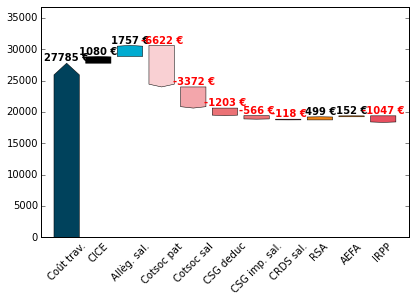

In [10]:
graphs.draw_waterfall(
    simulation = simulation,
    )

### Le cas d'un couple biactif

In [11]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salaire_de_base = 24000,
    ),
    parent2 = dict(
        birth = date(1980, 1, 1),
        salaire_de_base = 24000,
        )
    ).new_simulation(debug = True)

In [12]:
simulation.calculate_add('salaire_net')

array([ 18741.59960938,  18741.59960938], dtype=float32)

In [13]:
simulation.calculate('revdisp')

array([ 34977.8671875], dtype=float32)

In [14]:
simulation.calculate('impo')

array([-4850.61181641], dtype=float32)

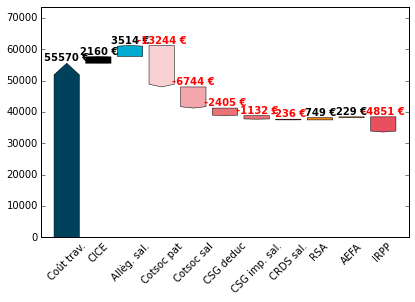

In [15]:
graphs.draw_waterfall(
    simulation = simulation,
    )

### Le cas d'un couple biactif avec enfants

In [16]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salaire_de_base = 24000,
        ),
    parent2 = dict(
        birth = date(1980, 1, 1),
        salaire_de_base = 24000,
        ),
    enfants = [
        dict(birth = date(2014 - 9, 1, 1)),
        dict(birth = date(2014 - 9, 1, 1)),
        ],
).new_simulation(debug = True)
    

In [17]:
simulation.calculate('revdisp')

array([ 40183.45703125], dtype=float32)

In [18]:
simulation.calculate('af')

array([ 1557.53991699], dtype=float32)

In [19]:
simulation.calculate('impo')

array([-2181.87768555], dtype=float32)

In [20]:
simulation.calculate('ars')

array([ 728.90319824], dtype=float32)

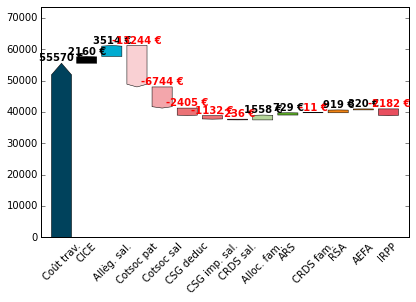

In [21]:
graphs.draw_waterfall(
    simulation = simulation,
    )

## Cas types dont on fait varier certaines caractéristiques

### Cas d'une personne seule dont on fait varier le salaire

In [22]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 10,
            min = 0,
            max = 50000,
            name = 'salaire_de_base',
            ),
        ],
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
    )
    ).new_simulation(debug = True)

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


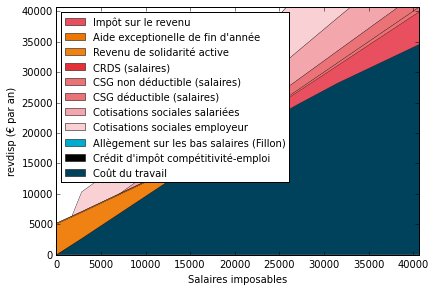

In [23]:
graphs.draw_bareme(
    simulation = simulation,
    x_axis = "salaire_imposable",
    legend_position = 2,
    )